# Amazon Prime Video View Time Forecast

In [481]:
import pandas as pd
import matplotlib.pyplot as plt
import pandasql 
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
from sklearn.utils import shuffle

#### Load in data...

In [544]:
df = pd.read_csv('TVdata.txt')

In [483]:
print('number of rows: ', df.shape[0])
print('number of columns: ', df.shape[1])

number of rows:  4226
number of columns:  16


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
video_id                         4226 non-null int64
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_poition      4226 non-null int64
import_id                        4226 non-null object
release_year                     4226 non-null int64
genres                           4226 non-null object
imdb_votes                       4226 non-null int64
budget                           4226 non-null int64
boxoffice                        4226 non-null int64
imdb_rating                      4226 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 4226 non-null int64
awards                           4226 non-null object
mpaa                             4226 non-null object
star_category                    4226 non-null float64
dtypes: float64(4), int64(8), obj

It seems there is no missing value

### Data Cleaning

When looking at features one by one, i have found there are several columns have a lot of zeros which shouldn't be zero. My guess is the values are missing and are imputed by 0. However, i think the value of 0 might be misleading. The plan is to impute the field either by mean or median

##### imbd_votes

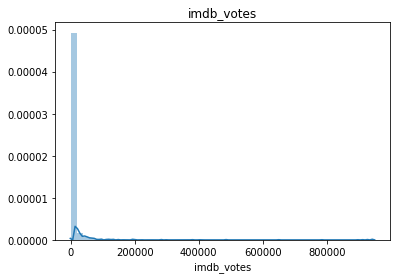

In [276]:
%matplotlib inline
sns.distplot(df.imdb_votes ).set_title('imdb_votes')

In [545]:
df.imdb_votes[df.imdb_votes == 0] = np.median(df.imdb_votes[df.imdb_votes != 0])

/Users/yucongweng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### Star Category

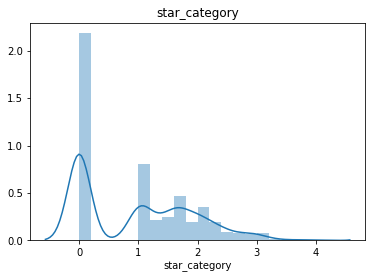

In [389]:
%matplotlib inline
sns.distplot(df.star_category ).set_title('star_category')

In [546]:
df.star_category[df.star_category == 0]  = np.median(df.star_category[df.star_category != 0])

/Users/yucongweng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### Budget

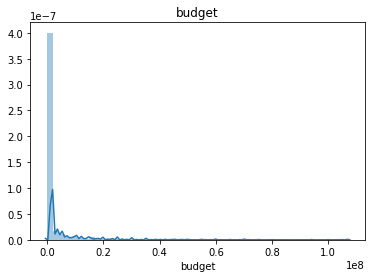

In [277]:
%matplotlib inline
sns.distplot(df.budget ).set_title('budget')

In [547]:
df.budget[df.budget == 0] = np.median(df.budget[df.budget != 0])

/Users/yucongweng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### box office

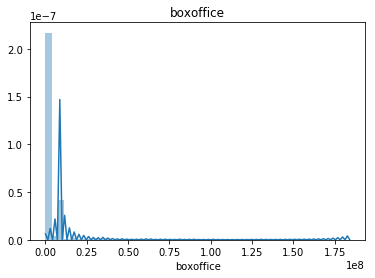

In [278]:
%matplotlib inline
sns.distplot(df.boxoffice).set_title('boxoffice')

In [548]:
df.boxoffice[df.boxoffice == 0] =  np.median(df.boxoffice[df.boxoffice != 0])

/Users/yucongweng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### imbd rating

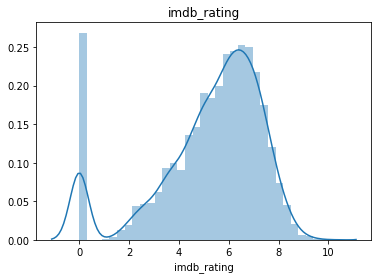

In [283]:
%matplotlib inline
sns.distplot(df.imdb_rating).set_title('imdb_rating')

In [549]:
df.imdb_rating[df.imdb_rating == 0] = np.median(df.imdb_rating[df.imdb_rating != 0])

/Users/yucongweng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### metacritic score

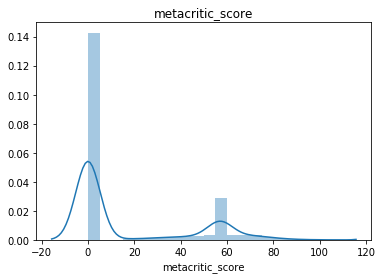

In [286]:
%matplotlib inline
sns.distplot(df.metacritic_score).set_title('metacritic_score')

In [550]:
df.metacritic_score[df.metacritic_score == 0]  = np.median(df.metacritic_score[df.metacritic_score != 0])

/Users/yucongweng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Feature Engineering

#### The Column "Genre"

The columns "genre" has values clustered together. Usually, a movie can be tagged with multiple genres. I am going to put each genre in seperate columns.

In [551]:
genres = df.genres.values

In [552]:
genres = list(genres)
#genres = set(genres)

In [553]:
# firstly i want to now many unique genres
g_list = []
for g in genres:
    g_i = g.split(',')
    for i in g_i:
        if i not in g_list:
            g_list.append(i)

In [554]:
print('There are total %d genres'%(len(g_list)))
print('below is the detailed genres:')
print(g_list)

There are total 27 genres
below is the detailed genres:
['Action', 'Thriller', 'Drama', 'Comedy', 'Crime', 'War', 'Documentary', 'Mystery', 'Adventure', 'Western', 'Sci-Fi', 'Fantasy', 'Horror', 'Sport', 'Kids & Family', 'Animation', 'Romance', 'Music', 'Independent', 'Musicals', 'Foreign/International', 'Lifestyle', 'Anime', 'Holiday', 'LGBT', 'Reality', 'Adult']


In [555]:
for g in g_list:
    df[g] = None
    

In [556]:
for i, row in df.iterrows():
    genre_lst = row['genres'].split(',')
    for g in genre_lst:
        df.at[i, g] = 1   

In [557]:
df.fillna(value=0, inplace=True)

In [558]:
print('the shape of the new data frame:')
print('number of rows: ', df.shape[0])
print('number of columns: ', df.shape[1])

the shape of the new data frame:
number of rows:  4226
number of columns:  43


#### Apply log to columns with heavy tail distribution

##### column "cvt_per_day"

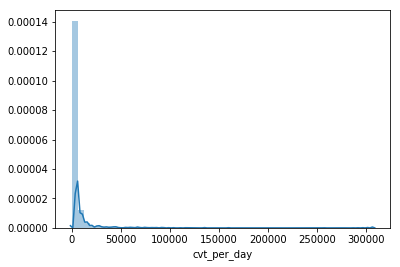

In [135]:
%matplotlib inline
sns.distplot(df.cvt_per_day)

the label "click per day" has several large outliers. they might be super popular movies and can be counted as special cases. I am going to apply log on these values and this the log values as the final label

In [138]:
log_cvt_per_day = np.log(df.cvt_per_day)

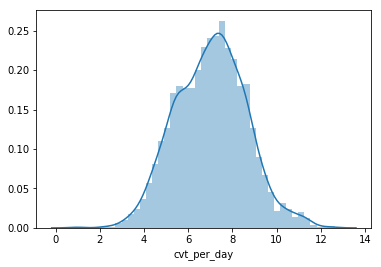

In [140]:
sns.distplot(log_cvt_per_day)

the log values mostly cluster at 6 to 9

In [559]:
df['log_click_per_day'] = log_cvt_per_day

In [502]:
df.cvt_per_day = log_cvt_per_day

##### Some other columns show the same distribution. apply log to them as well.

In [560]:
df[['imdb_votes', 'budget', 'boxoffice']] = df[['imdb_votes', 'budget', 'boxoffice']].apply(np.log)

#### Cateogrical Varible

In [561]:
# add in categorical variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['awards'] = le.fit_transform(df['awards'])

lf = preprocessing.LabelEncoder()
df['mpaa'] = lf.fit_transform(df['mpaa'])

lh = preprocessing.LabelEncoder()
df['import_id'] = lf.fit_transform(df['import_id'])

#### Time Series Data

Now i am going to look at the time series data. Internet is a very new thing but still there are many people like watching old movies

In [157]:
q = 'select * from  df where release_year < 2017 '
df_sub =  pandasql.sqldf(q)

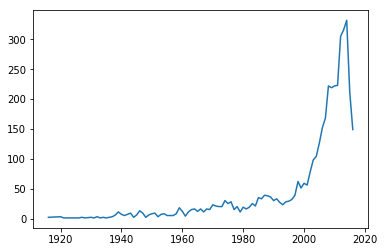

In [158]:
plt.plot(df_sub.groupby('release_year').count().video_id)
plt.show()

I ploted the movie volume across the years since 1920 till 2016 (full year data). As expected, only a small number of movies are released before 2000. I am going bucket several years together to make samples distribute more evenly

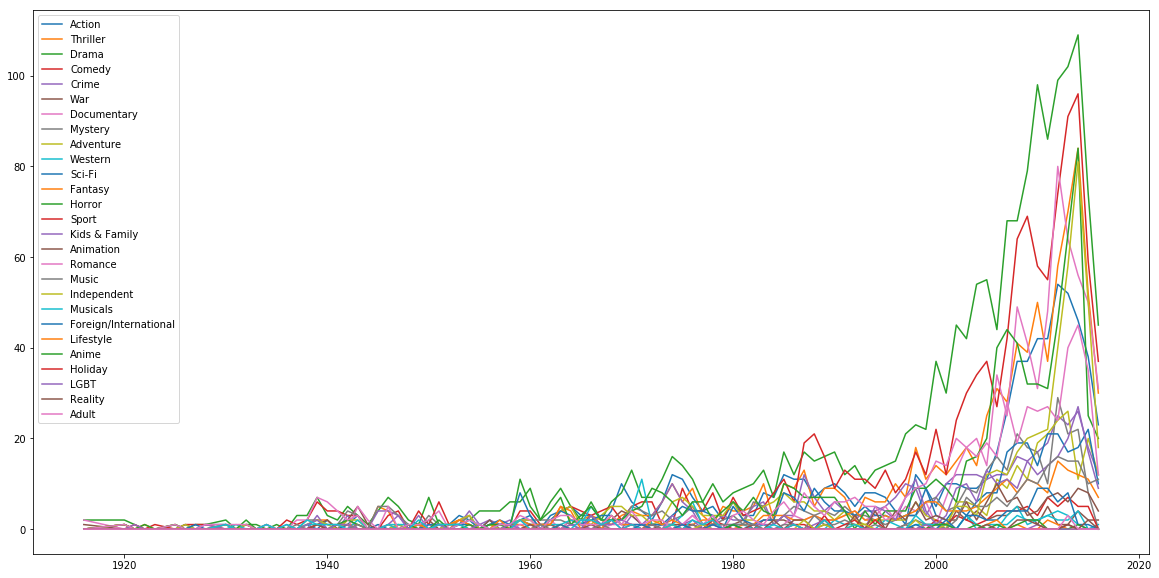

In [160]:
plt.figure(figsize=(20,10))
for g in g_list:
    plt.plot(df_sub.groupby('release_year').sum()[g], label = g)

plt.legend()
plt.show()


In [562]:
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014,2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
df['year_bucket'] = pd.cut(df['release_year'], bin_year, labels=year_range)

In [563]:
df = df[df['release_year'] != 1916]

### Model Selection

In [571]:
# only keep numerical columns 
to_drop = ['import_id', 'genres', 'awards','mpaa','cvt_per_day','video_id','year_bucket','log_click_per_day']
train_space = df.drop(to_drop, axis = 1)
X = train_space
y = df['cvt_per_day']


In [572]:
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' feature')
print('testing data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' feature')

training data has 3379 observation with 37 feature
testing data has 845 observation with 37 feature


In [573]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [574]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVC 

# Logistic Regression
regressor_linear = LinearRegression()

# K Nearest Neighbors
regressor_KNN = KNeighborsRegressor()

# Random Forest
regressor_RF = RandomForestRegressor()

# Support Vector Machine
#classfier_SVC = SVC()

In [575]:
model_names = ['Linear Regression', 'KNN', 'Random Forest']
model_list = [regressor_linear, regressor_KNN, regressor_RF]
count = 0

for regressor in model_list:
    cv_score = model_selection.cross_val_score(regressor, X_train, y_train, cv = 5)
    print(cv_score)
    print('Model score of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[ 0.20850378  0.22299763  0.27851381  0.25090934 -0.59718666]
Model score of Linear Regression is 0.0727475796241
[ 0.18856708  0.26836249  0.00724282  0.27060708  0.09029794]
Model score of KNN is 0.165015481128
[ 0.5893402   0.66000755 -0.17481646  0.6417453   0.49327492]
Model score of Random Forest is 0.441910301266


I am going to choose Random Forest

### Random Forest

In [513]:
df = shuffle(df)

In [515]:
li = preprocessing.LabelEncoder()
df['year_bucket'] = li.fit_transform(df['year_bucket'])

In [530]:
#to_drop = ['genres','cvt_per_day','video_id','year_bucket']
to_drop = ['genres','cvt_per_day','video_id','release_year']
train_space = df.drop(to_drop, axis = 1)
X = train_space
y = df['cvt_per_day']

In [531]:
cutoff = 0.8
Xtrain, ytrain = X[:int(0.8*X.shape[0])], y[:int(0.8*X.shape[0])]
Xtest, ytest = X[int(0.8*X.shape[0]):], y[int(0.8*X.shape[0]):]

In [532]:
print('number of samples in train set is ', len(Xtrain))
print('number of samples in test set is ', len(Xtest))

number of samples in train set is  3379
number of samples in test set is  845


In [448]:
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [536]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': (40,45,50,55,60) ,
    'max_depth' : (12,14,16,10)
}

Grid_RF = GridSearchCV(RandomForestRegressor(), parameters, cv = 5)
Grid_RF.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': (40, 45, 50, 55, 60), 'max_depth': (12, 14, 16, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [537]:
print_grid_search_metrics(Grid_RF)

Best score: 0.54249802628
Best parameters set:
max_depth:16
n_estimators:60


In [538]:
rf = RandomForestRegressor(max_depth = 16, n_estimators=55)
rf.fit(Xtrain, ytrain)
print('the score of test set is :', rf.score(Xtest, ytest))

the score of test set is : 0.558649875991


### Result Analysis

In [539]:
predicted_test = rf.predict(Xtest)

In [540]:
true_value = ytest.values

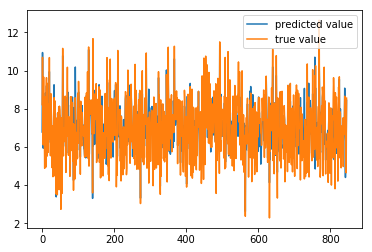

In [460]:
plt.plot(predicted_test, label = 'predicted value')
plt.plot(true_value, label = 'true value')
plt.legend()
plt.show()

In [461]:
#residuals
residuals = predicted_test - true_value

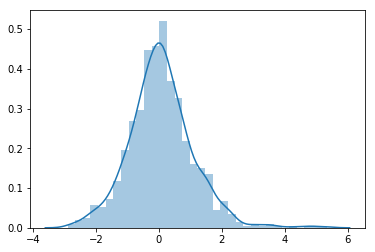

In [462]:
sns.distplot(residuals)

The R square finally arrive at 0.58. The distribution of residual is attached above which seem to be normally distributed and centered at 1.

### Feature Importance Discussion

In [578]:
importances = rf.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), Xtrain.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
import_id: 0.2356
imdb_votes: 0.1536
weighted_horizontal_poition: 0.126
duration_in_mins: 0.1097
weighted_categorical_position: 0.0983
imdb_rating: 0.0599
year_bucket: 0.0487
budget: 0.0262
star_category: 0.0218
boxoffice: 0.0126
Kids & Family: 0.0122
mpaa: 0.0116
metacritic_score: 0.0102
awards: 0.0072
Comedy: 0.0065
Documentary: 0.0061
Drama: 0.0055
Thriller: 0.0054
Romance: 0.0052
Horror: 0.0048
Independent: 0.004
Action: 0.0035
Crime: 0.0032
Music: 0.0031
Sci-Fi: 0.0029
Mystery: 0.0024
Animation: 0.0024
Adventure: 0.002
Western: 0.0017
Fantasy: 0.0016
Sport: 0.0015
Musicals: 0.0014
Foreign/International: 0.0011
War: 0.0007
Lifestyle: 0.0007
LGBT: 0.0003
Reality: 0.0002
Anime: 0.0002
Holiday: 0.0001
Adult: 0.0
